*Problem Statement:* Ocean temperature fluctuations can significantly impact marine ecosystems. This project aims to explore potential correlations between changes in sea surface temperature and variations in Scottish salmon catch statistics over a long-term period. The goal is to understand how temperature changes may influence salmon populations.

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load datasets 

In [15]:
temperature_path = "data/ohc_levitus_climdash_seasonal.csv"
temperature_data = pd.read_csv(temperature_path)

salmon_path = 'data/SalmonandSeaTroutNets1952-2022.csv'
salmon_data = pd.read_csv(salmon_path)

Create a list to store key-value pairs for year & temperature anomalies. Iterate over rows and populate the list of pairs with appropriate data tags then make into data frame. 

In [16]:
# Create a list to store key-value pairs for yearly temperature anomalies 
yearly_anomaly_pairs = []

# Iterate over rows and populate the list
for index, row in temperature_data.iterrows():
    year = row['Year']
    anomaly = row['heat content anomaly (10^22 Joules)']
    pair = {'Year': year, 'Anomaly': anomaly}  # Create a dictionary for each pair
    yearly_anomaly_pairs.append(pair)

# Convert the list of dictionaries into a DataFrame
yearly_anomaly_df = pd.DataFrame(yearly_anomaly_pairs)

# Merge datasets on 'Year'
merged_data = pd.merge(salmon_data, yearly_anomaly_df, on='Year', how='inner')

Merge two datasets based on 'Year' to then start statistical analysis. 

In [17]:
merged_data = pd.merge(salmon_data, yearly_anomaly_df, on='Year', how='inner')


Plot based on year, wild salmon catches (MSW Number) & heat anomalies 

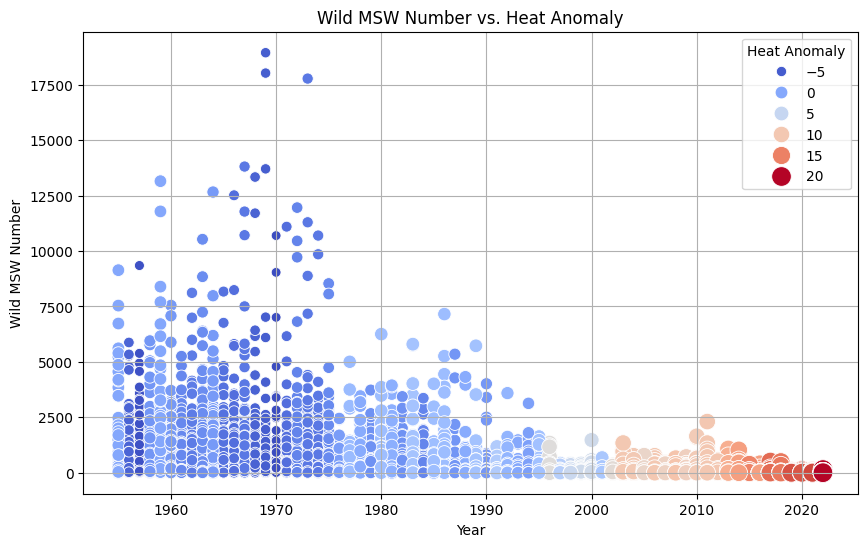

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Year', y='Wild MSW number', hue='Anomaly', palette='coolwarm', size='Anomaly', sizes=(50, 200))
plt.title('Wild MSW Number vs. Heat Anomaly')
plt.xlabel('Year')
plt.ylabel('Wild MSW Number')
plt.legend(title='Heat Anomaly')
plt.grid(True)
plt.show()

Calculate correlation matrix

In [19]:
# Convert all columns to numeric data types
merged_data_numeric = merged_data.apply(pd.to_numeric, errors='coerce')


correlation_matrix = merged_data_numeric.corr()


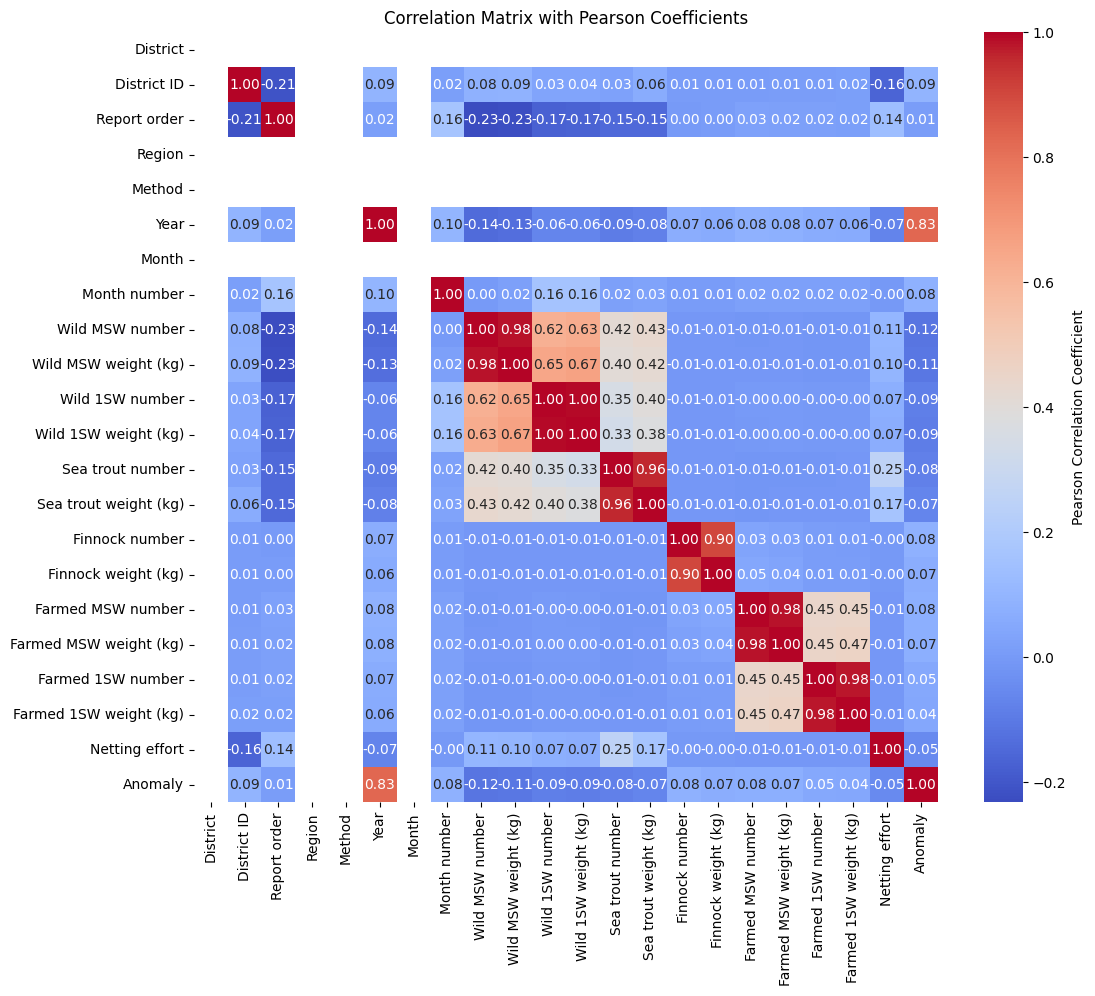

In [20]:
# Calculate Pearson correlation coefficients
pearson_coefficients = merged_data_numeric.corr(method='pearson')
# Plot correlation matrix with Pearson coefficients
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, 
            cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Correlation Matrix with Pearson Coefficients')
plt.show()

In [21]:
# Split data
X = merged_data[['Anomaly']]  # Predictor variable(s)
y = merged_data['Wild MSW number']  # Response variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [23]:
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 501259.47
R-squared (R2): 0.01


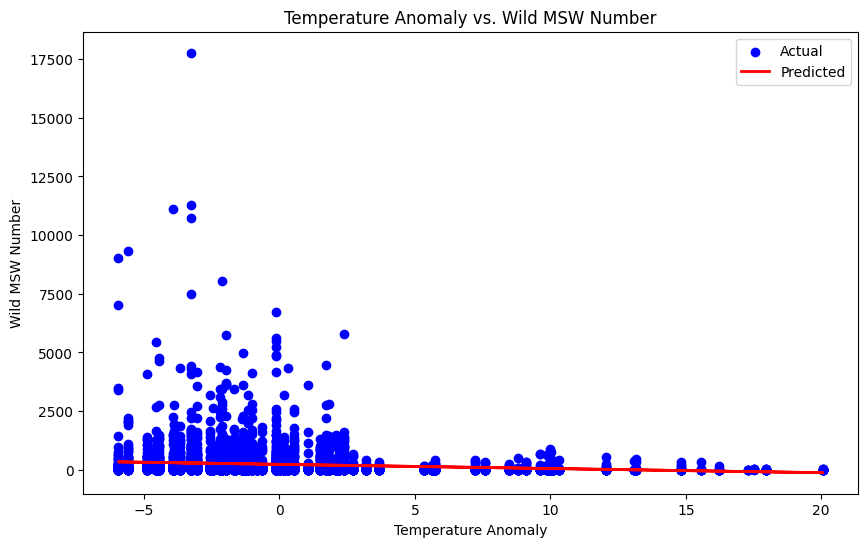

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')
plt.title('Temperature Anomaly vs. Wild MSW Number')
plt.xlabel('Temperature Anomaly')
plt.ylabel('Wild MSW Number')
plt.legend()
plt.show()